In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
raw_data = pd.read_excel('outputData.xlsx')
raw_data.head()

,Sector,LOB,Factory Reference,Qman Family,LOB Family,Family for Capacity,m1,m2,m3,m4,...,m24,m25,m26,m27,m28,m29,m30,m31,m32,m33
0,PCBA,PCBA,HRB10574,Spare Part Phoenix,PHOENIX,Spare part,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,PCBA,PCBA,HRB10576,Spare Part Phoenix,PHOENIX,Spare part,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Non-Drive,RM,NHA31009,NaN,XS7/8 Cubique 40X40 (T4),Spare part,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Non-Drive,PCBA,S1B86598,NaN,PCBA XCSE,Spare part,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Non-Drive,PCBA,SZ1RB4505RM,NaN,PCBA XS7 Optimum OSIPROX,Spare part,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = raw_data.iloc[:,8:38]
data.head()

,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,...,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(1907, 30)

In [5]:
raw_data.shape

(1907, 39)

In [6]:
data.describe()

,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,...,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32
count,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,...,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,256.020986,230.294858,212.449108,187.793809,309.551941,264.877230,205.895068,247.211962,257.340504,205.315320,...,226.754588,242.697431,257.743576,331.788149,286.982695,255.153120,212.213424,199.023597,180.897745,209.856843
std,1564.893834,1248.287656,1274.358575,1795.180887,2448.442926,1276.561695,791.676587,1194.589200,1320.541073,1230.121017,...,1182.055732,1719.584609,1308.752858,2889.842233,2608.632698,1241.933389,1117.695539,1380.240465,949.024986,1304.926667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,3.000000,0.000000,0.000000,1.000000,5.000000,1.000000,5.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98.000000,84.000000,60.000000,48.000000,78.750000,90.000000,80.000000,96.000000,89.000000,56.750000,...,56.000000,48.000000,44.000000,63.500000,52.000000,59.000000,40.000000,20.000000,54.500000,45.000000
max,51840.000000,31104.000000,41472.000000,72576.000000,93312.000000,30720.000000,11488.000000,31104.000000,31104.000000,41472.000000,...,32000.000000,62208.000000,30931.000000,114048.000000,103680.000000,31104.000000,31104.000000,51840.000000,31104.000000,41472.000000


In [7]:
data.columns

Index(['m3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13',
       'm14', 'm15', 'm16', 'm17', 'm18', 'm19', 'm20', 'm21', 'm22', 'm23',
       'm24', 'm25', 'm26', 'm27', 'm28', 'm29', 'm30', 'm31', 'm32'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m3      1906 non-null   float64
 1   m4      1906 non-null   float64
 2   m5      1906 non-null   float64
 3   m6      1906 non-null   float64
 4   m7      1906 non-null   float64
 5   m8      1906 non-null   float64
 6   m9      1906 non-null   float64
 7   m10     1906 non-null   float64
 8   m11     1906 non-null   float64
 9   m12     1906 non-null   float64
 10  m13     1906 non-null   float64
 11  m14     1906 non-null   float64
 12  m15     1906 non-null   float64
 13  m16     1907 non-null   int64  
 14  m17     1907 non-null   int64  
 15  m18     1907 non-null   int64  
 16  m19     1907 non-null   int64  
 17  m20     1907 non-null   int64  
 18  m21     1907 non-null   int64  
 19  m22     1907 non-null   int64  
 20  m23     1907 non-null   int64  
 21  m24     1907 non-null   int64  
 22  

# Data Preprocessing

## remove null

In [9]:
data.isnull().sum()

m3     1
m4     1
m5     1
m6     1
m7     1
m8     1
m9     1
m10    1
m11    1
m12    1
m13    1
m14    1
m15    1
m16    0
m17    0
m18    0
m19    0
m20    0
m21    0
m22    0
m23    0
m24    0
m25    0
m26    0
m27    0
m28    0
m29    0
m30    0
m31    0
m32    0
dtype: int64

In [10]:
data1 = data.dropna()
data1.isnull().sum()

m3     0
m4     0
m5     0
m6     0
m7     0
m8     0
m9     0
m10    0
m11    0
m12    0
m13    0
m14    0
m15    0
m16    0
m17    0
m18    0
m19    0
m20    0
m21    0
m22    0
m23    0
m24    0
m25    0
m26    0
m27    0
m28    0
m29    0
m30    0
m31    0
m32    0
dtype: int64

In [11]:
data1.shape

(1906, 30)

## remove duplicate

In [12]:
data1.duplicated(keep='first').sum()

373

In [13]:
data1.drop_duplicates()

,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,...,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,60,0
6,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,56
8,60.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,40.0,60.0,...,0,0,0,0,160,0,0,0,0,0
9,0.0,11.0,73.0,2.0,1.0,22.0,1.0,0.0,1.0,3.0,...,14,0,0,33,48,31,23,40,20,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1898,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,4,7,0,0,0,7,0
1899,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,0,0,0,0,0,0,0,0


In [14]:
data1.shape

(1906, 30)

## Outliers

In [15]:
data1.describe()

,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,...,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32
count,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,...,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000
mean,256.020986,230.294858,212.449108,187.793809,309.551941,264.877230,205.895068,247.211962,257.340504,205.315320,...,226.873557,242.824764,257.878804,331.962225,287.133263,255.286988,212.324764,199.128017,180.992655,209.962225
std,1564.893834,1248.287656,1274.358575,1795.180887,2448.442926,1276.561695,791.676587,1194.589200,1320.541073,1230.121017,...,1182.354522,1720.026892,1309.082991,2890.590622,2609.309000,1242.245551,1117.978280,1380.595151,949.264989,1305.261006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,3.000000,0.000000,0.000000,1.000000,5.000000,1.000000,5.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98.000000,84.000000,60.000000,48.000000,78.750000,90.000000,80.000000,96.000000,89.000000,56.750000,...,56.000000,48.000000,44.000000,63.750000,52.000000,59.500000,40.000000,20.000000,54.750000,45.000000
max,51840.000000,31104.000000,41472.000000,72576.000000,93312.000000,30720.000000,11488.000000,31104.000000,31104.000000,41472.000000,...,32000.000000,62208.000000,30931.000000,114048.000000,103680.000000,31104.000000,31104.000000,51840.000000,31104.000000,41472.000000


In [16]:
data1.shape

(1906, 30)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

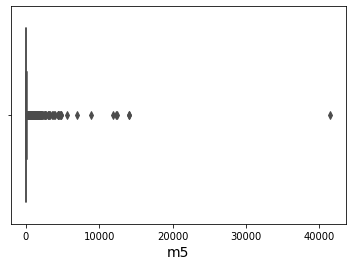

In [18]:
%matplotlib inline
sns.boxplot(x=data1['m5'], color='lime') 
plt.xlabel('m5', fontsize=14) 
plt.show()

In [19]:
data_cleaned_1=data1[data1['m5']>=1]

In [20]:
data_cleaned_1=data_cleaned_1[data_cleaned_1['m5']<40000]

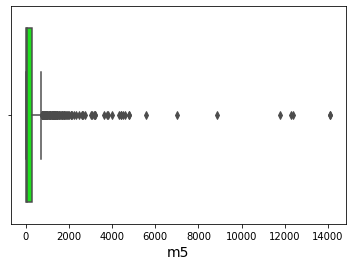

In [21]:
%matplotlib inline
sns.boxplot(x=data_cleaned_1['m5'], color='lime') 
plt.xlabel('m5', fontsize=14) 
plt.show()

In [22]:
data_cleaned_1

,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,...,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32
9,0.0,11.0,73.0,2.0,1.0,22.0,1.0,0.0,1.0,3.0,...,14,0,0,33,48,31,23,40,20,10
18,0.0,6.0,6.0,0.0,0.0,0.0,6.0,24.0,0.0,0.0,...,0,0,12,0,6,0,0,0,0,0
28,0.0,5.0,22.0,15.0,4.0,20.0,8.0,14.0,6.0,0.0,...,18,0,0,0,0,9,0,2,17,54
31,0.0,1.0,16.0,0.0,32.0,32.0,82.0,0.0,48.0,0.0,...,96,330,48,114,0,1,0,0,0,85
35,12.0,4.0,10.0,6.0,4.0,0.0,0.0,9.0,170.0,4.0,...,270,968,1022,698,2492,544,528,1162,592,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,17.0,15.0,37.0,21.0,3.0,4.0,33.0,3.0,14.0,3.0,...,33,0,0,18,0,0,32,11,29,0
1800,21.0,15.0,4.0,9.0,13.0,2.0,8.0,0.0,20.0,2.0,...,30,9,0,9,12,1,0,27,23,0
1802,16.0,30.0,3.0,15.0,4.0,2.0,18.0,16.0,19.0,3.0,...,0,0,42,60,0,0,0,0,25,0
1821,0.0,180.0,225.0,45.0,0.0,225.0,0.0,135.0,180.0,0.0,...,0,0,0,0,90,180,0,0,180,45


In [23]:
print(data_cleaned_1.describe().to_string(max_cols=data_cleaned_1.shape[1]))

                 m3            m4           m5            m6            m7            m8            m9           m10           m11           m12           m13           m14           m15           m16           m17           m18           m19           m20           m21           m22           m23           m24           m25           m26           m27           m28           m29           m30           m31           m32
count    900.000000    900.000000    900.00000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000    900.000000
mean     445.367778    415.060000    403.84000    282.644444    501.077778    500.532222    397.696667    452.480000    477.954444    365.633333    51

In [24]:
data_cleaned_1.shape

(900, 30)

In [25]:
data_cleaned_2=data_cleaned_1[data_cleaned_1['m24']>=1]

In [26]:
print(data_cleaned_2.describe().to_string(max_cols=data_cleaned_2.shape[1]))

                 m3            m4            m5            m6            m7            m8            m9           m10           m11           m12           m13           m14           m15           m16           m17           m18           m19           m20           m21           m22           m23           m24           m25           m26           m27           m28           m29           m30           m31           m32
count    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000    533.000000
mean     638.195122    609.649156    577.919325    413.373358    757.217636    736.013133    606.005629    693.196998    738.153846    562.585366   

In [27]:
data_cleaned_2.head()

,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,...,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32
31,0.0,1.0,16.0,0.0,32.0,32.0,82.0,0.0,48.0,0.0,...,96,330,48,114,0,1,0,0,0,85
35,12.0,4.0,10.0,6.0,4.0,0.0,0.0,9.0,170.0,4.0,...,270,968,1022,698,2492,544,528,1162,592,144
36,176.0,1479.0,1052.0,859.0,958.0,1380.0,1266.0,2960.0,2243.0,1409.0,...,5703,5537,4769,6060,7573,9018,3753,9477,7672,3376
38,0.0,0.0,1.0,32.0,16.0,16.0,89.0,86.0,34.0,0.0,...,70,262,172,384,32,0,168,0,0,4
52,49.0,32.0,6.0,5.0,3.0,173.0,16.0,33.0,50.0,0.0,...,467,3,0,32,0,16,142,0,259,63


In [28]:
data_cleaned_3=data_cleaned_2[data_cleaned_2['m25']>=1]

In [29]:
print(data_cleaned_3.describe().to_string(max_cols=data_cleaned_3.shape[1]))

                 m3            m4            m5            m6            m7            m8            m9           m10           m11           m12           m13           m14           m15           m16           m17           m18           m19           m20           m21           m22           m23           m24           m25           m26           m27           m28           m29           m30           m31           m32
count    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000    398.000000
mean     773.547739    750.979899    716.017588    498.449749    926.422111    911.020101    744.487437    867.781407    917.904523    688.474874   

In [30]:
data_cleaned_4=data_cleaned_3[data_cleaned_3['m29']>=1]

In [31]:
print(data_cleaned_4.describe().to_string(max_cols=data_cleaned_4.shape[1]))

                 m3            m4            m5            m6            m7            m8            m9           m10           m11           m12           m13           m14           m15           m16           m17           m18           m19           m20           m21           m22           m23           m24           m25           m26           m27           m28           m29           m30          m31           m32
count    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000    287.000000   287.000000    287.000000
mean     793.878049    794.679443    793.543554    543.355401    999.968641   1008.505226    833.658537    960.313589    995.505226    769.348432   10

In [32]:
data_cleaned_4.to_excel("converted-to-excel.xlsx")

# Random Forest PCA

### PCA

In [33]:
data_cleaned = data_cleaned_4

In [34]:
data_cleaned.shape

(287, 30)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

In [36]:
X = data_cleaned.iloc[:, :24]
X

,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,...,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26
35,12.0,4.0,10.0,6.0,4.0,0.0,0.0,9.0,170.0,4.0,...,195,366,106,16,384,225,270,968,1022,698
36,176.0,1479.0,1052.0,859.0,958.0,1380.0,1266.0,2960.0,2243.0,1409.0,...,2258,2732,3214,22,2228,5309,5703,5537,4769,6060
38,0.0,0.0,1.0,32.0,16.0,16.0,89.0,86.0,34.0,0.0,...,0,96,186,0,266,16,70,262,172,384
56,137.0,151.0,10.0,285.0,139.0,280.0,168.0,154.0,271.0,128.0,...,487,434,615,8,0,1383,1371,1069,1110,375
59,422.0,300.0,325.0,276.0,246.0,323.0,214.0,359.0,358.0,380.0,...,104,528,1780,336,983,1404,1430,4426,2322,3892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,315.0,135.0,270.0,0.0,90.0,270.0,180.0,0.0,270.0,90.0,...,495,45,0,405,180,0,360,405,8,270
1722,270.0,315.0,1395.0,0.0,450.0,1440.0,450.0,585.0,810.0,990.0,...,360,810,0,0,0,225,540,405,360,900
1759,20.0,4.0,60.0,4.0,8.0,140.0,44.0,96.0,92.0,80.0,...,68,8,32,8,92,4,552,8,24,40
1761,40.0,0.0,156.0,4.0,0.0,28.0,20.0,4.0,0.0,0.0,...,28,0,8,4,1,0,88,80,76,0


In [37]:
y = data_cleaned.iloc[:, 24:]
y

,m27,m28,m29,m30,m31,m32
35,2492,544,528,1162,592,144
36,7573,9018,3753,9477,7672,3376
38,32,0,168,0,0,4
56,1225,747,1559,103,1345,207
59,894,2385,2971,2106,2537,1638
...,...,...,...,...,...,...
1699,45,45,45,135,0,0
1722,315,1035,720,630,810,630
1759,58,100,21,84,32,448
1761,19,88,18,42,24,104


### Training

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_test_raw = x_test
x_train_raw = x_train
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [39]:
x_test

array([[-0.35618972, -0.33092127, -0.4051964 , ..., -0.21790793,
        -0.26775867, -0.39289282],
       [-0.52505559, -0.51294468, -0.3740881 , ..., -0.63595273,
        -0.59085357, -0.49771492],
       [-0.09616617,  0.31049457,  0.18434374, ..., -0.36474804,
         0.34221735,  0.14414728],
       ...,
       [-0.18582946, -0.10844821, -0.22537528, ...,  0.06228698,
        -0.19533109, -0.50233264],
       [-0.57437041, -0.44793632, -0.51369606, ..., -0.54305389,
        -0.4499593 , -0.47462636],
       [-0.39504382, -0.28180384, -0.43782217, ..., -0.3572562 ,
        -0.46693451,  0.16261813]])

In [40]:
x_test_raw.head()

,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,...,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26
70,292.0,252.0,203.0,334.0,53.0,23.0,215.0,129.0,309.0,166.0,...,216,410,287,309,843,901,1154,586,592,237
1300,66.0,0.0,244.0,2.0,414.0,196.0,116.0,22.0,398.0,148.0,...,18,30,13,4,58,28,43,28,21,10
798,640.0,1140.0,980.0,810.0,1690.0,730.0,880.0,900.0,1310.0,640.0,...,1575,110,1430,180,440,0,420,390,1670,1400
1145,576.0,0.0,936.0,96.0,552.0,384.0,1018.0,922.0,1006.0,576.0,...,0,432,312,600,1320,1416,336,698,96,864
1169,540.0,680.0,400.0,100.0,680.0,1060.0,1080.0,680.0,940.0,640.0,...,400,820,1306,360,700,780,220,500,1380,1040


In [41]:
x_train_raw.head()

,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,...,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26
794,432.0,0.0,312.0,160.0,520.0,549.0,323.0,291.0,446.0,303.0,...,104,416,392,456,56,120,56,200,288,240
231,3072.0,2028.0,4404.0,3624.0,3816.0,2376.0,2712.0,2592.0,4464.0,2793.0,...,4243,3348,2684,3066,1590,3250,2724,2867,4729,5229
777,600.0,211.0,465.0,240.0,291.0,690.0,186.0,336.0,360.0,216.0,...,24,0,679,857,629,336,336,72,729,520
1154,360.0,288.0,888.0,0.0,408.0,504.0,960.0,504.0,480.0,528.0,...,216,864,552,936,192,864,0,408,792,312
392,864.0,576.0,160.0,160.0,384.0,256.0,0.0,416.0,96.0,192.0,...,192,0,480,864,0,0,0,96,384,192


In [42]:
y_test.head()

,m27,m28,m29,m30,m31,m32
70,0,859,1615,448,51,225
1300,154,101,20,8,119,110
798,830,1540,840,3631,2607,876
1145,744,960,864,0,1056,816
1169,460,500,1640,860,1180,500


In [43]:
x_train

array([[-0.25158255, -0.51294468, -0.32249386, ..., -0.50709304,
        -0.43977417, -0.39150751],
       [ 1.72100994,  0.95191042,  2.78226576, ...,  1.49098134,
         2.07312331,  1.91226984],
       [-0.12605393, -0.36053619, -0.2064068 , ..., -0.60298863,
        -0.19023853, -0.26221153],
       ...,
       [ 0.71678104,  0.15158524,  0.72532458, ..., -0.62096905,
         0.45425376, -0.32408889],
       [ 2.70132863,  3.04662432,  1.14035476, ..., -0.10553029,
         0.42935678,  5.29012739],
       [ 0.23259925,  0.26715567,  0.1388194 , ..., -0.62696252,
         0.32750549, -0.46539093]])

In [44]:
x_test

array([[-0.35618972, -0.33092127, -0.4051964 , ..., -0.21790793,
        -0.26775867, -0.39289282],
       [-0.52505559, -0.51294468, -0.3740881 , ..., -0.63595273,
        -0.59085357, -0.49771492],
       [-0.09616617,  0.31049457,  0.18434374, ..., -0.36474804,
         0.34221735,  0.14414728],
       ...,
       [-0.18582946, -0.10844821, -0.22537528, ...,  0.06228698,
        -0.19533109, -0.50233264],
       [-0.57437041, -0.44793632, -0.51369606, ..., -0.54305389,
        -0.4499593 , -0.47462636],
       [-0.39504382, -0.28180384, -0.43782217, ..., -0.3572562 ,
        -0.46693451,  0.16261813]])

In [45]:
x_train.shape

(229, 24)

In [46]:
x_test.shape

(58, 24)

In [47]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=7)
 
# x_train = pca.fit_transform(x_train)
# x_test = pca.transform(x_test)

# explained_variance = pca.explained_variance_ratio_

In [48]:
# explained_variance

In [49]:
# import matplotlib.pyplot as plt
# plt.style.use("ggplot") 
# plt.plot(pca.explained_variance_, marker='o')
# plt.xlabel("Eigenvalue number")
# plt.ylabel("Eigenvalue size")
# plt.title("Scree Plot")

## Random Forest

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_estimators=1000, max_leaf_nodes=15, max_depth=20, random_state=42)
# model.fit(x_train, y_train)


In [51]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [52]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [53]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [54]:
y_test.head()

,m27,m28,m29,m30,m31,m32
70,0,859,1615,448,51,225
1300,154,101,20,8,119,110
798,830,1540,840,3631,2607,876
1145,744,960,864,0,1056,816
1169,460,500,1640,860,1180,500


In [55]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)

best_random = rf_random.best_estimator_
best_random

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=1000)

In [56]:
model = RandomForestRegressor(max_depth=50, max_features='sqrt', n_estimators=200, random_state=42)

In [57]:
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=50, max_features='sqrt', n_estimators=200,
                      random_state=42)

### Accuracy training

In [58]:
x_train.shape

(229, 24)

In [59]:
train_predict = model.predict(x_train)
train_predict

array([[ 438.515,  523.6  ,  478.6  ,  236.335,  157.845,  138.235],
       [3330.01 , 4140.62 , 2450.535, 3044.   , 2286.695, 4052.985],
       [ 526.895,  524.01 ,  414.32 ,  743.435,  370.795, 1005.025],
       ...,
       [2070.12 , 1004.35 , 2022.37 , 1563.83 ,  697.765, 1511.24 ],
       [3262.755, 6568.88 , 3644.925, 1983.705, 1791.63 , 1655.79 ],
       [ 441.445,  578.645, 1388.765, 1641.44 ,  660.91 , 1815.63 ]])

In [98]:
x_train_raw = x_train_raw.reset_index(drop=True)
x_train_raw.head()

,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,...,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26
0,432.0,0.0,312.0,160.0,520.0,549.0,323.0,291.0,446.0,303.0,...,104,416,392,456,56,120,56,200,288,240
1,3072.0,2028.0,4404.0,3624.0,3816.0,2376.0,2712.0,2592.0,4464.0,2793.0,...,4243,3348,2684,3066,1590,3250,2724,2867,4729,5229
2,600.0,211.0,465.0,240.0,291.0,690.0,186.0,336.0,360.0,216.0,...,24,0,679,857,629,336,336,72,729,520
3,360.0,288.0,888.0,0.0,408.0,504.0,960.0,504.0,480.0,528.0,...,216,864,552,936,192,864,0,408,792,312
4,864.0,576.0,160.0,160.0,384.0,256.0,0.0,416.0,96.0,192.0,...,192,0,480,864,0,0,0,96,384,192


In [99]:
df1 = pd.DataFrame(x_train_raw)
df2 = pd.DataFrame(train_predict)

In [100]:
train_result = pd.concat([df1, df2], axis=1, ignore_index=True)

In [101]:
train_result['SUM'] = train_result[24] + train_result[29] + train_result[28] + train_result[27] + train_result[26] + train_result[25] 

In [102]:
train_result.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,SUM
0,432.0,0.0,312.0,160.0,520.0,549.0,323.0,291.0,446.0,303.0,...,200,288,240,438.515,523.600,478.600,236.335,157.845,138.235,1973.130
1,3072.0,2028.0,4404.0,3624.0,3816.0,2376.0,2712.0,2592.0,4464.0,2793.0,...,2867,4729,5229,3330.010,4140.620,2450.535,3044.000,2286.695,4052.985,19304.845
2,600.0,211.0,465.0,240.0,291.0,690.0,186.0,336.0,360.0,216.0,...,72,729,520,526.895,524.010,414.320,743.435,370.795,1005.025,3584.480
3,360.0,288.0,888.0,0.0,408.0,504.0,960.0,504.0,480.0,528.0,...,408,792,312,568.595,1068.585,803.835,933.230,590.270,462.345,4426.860
4,864.0,576.0,160.0,160.0,384.0,256.0,0.0,416.0,96.0,192.0,...,96,384,192,370.730,154.195,224.805,161.430,360.300,129.285,1400.745


In [104]:
y_train = y_train.reset_index(drop=True)

In [105]:
train_data = pd.concat([x_train_raw, y_train], axis=1, ignore_index=True)

In [106]:
train_data['SUM'] = train_data[24] + train_data[29] + train_data[28] + train_data[27] + train_data[26] + train_data[25]

In [107]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,SUM
0,432.0,0.0,312.0,160.0,520.0,549.0,323.0,291.0,446.0,303.0,...,200,288,240,512,615,480,142,76,76,1901
1,3072.0,2028.0,4404.0,3624.0,3816.0,2376.0,2712.0,2592.0,4464.0,2793.0,...,2867,4729,5229,3631,4944,2511,3322,2515,4807,21730
2,600.0,211.0,465.0,240.0,291.0,690.0,186.0,336.0,360.0,216.0,...,72,729,520,577,525,248,933,375,1461,4119
3,360.0,288.0,888.0,0.0,408.0,504.0,960.0,504.0,480.0,528.0,...,408,792,312,384,1200,864,1104,528,336,4416
4,864.0,576.0,160.0,160.0,384.0,256.0,0.0,416.0,96.0,192.0,...,96,384,192,384,0,96,0,384,0,864


In [108]:
df_train = train_result
df_predict = train_data
errors = abs(df_predict['SUM'] - df_train['SUM'])
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 650.82 degrees.


In [110]:
mape = 100 * (errors / df_train['SUM'])
    # Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Train Accuracy:', round(accuracy, 2), '%.')
df_perform = pd.DataFrame(df_predict['SUM'], columns = ['Prediction'])
df_perform['Target'] = df_train['SUM'].reset_index(drop=True)
df_perform['Residual'] = df_perform['Target'] - df_perform['Prediction']
df_perform['Difference%'] = np.absolute(df_perform['Residual']/df_perform['Target']*100)
print(df_perform.describe())
print()

Train Accuracy: 84.06 %.
             Target
count    229.000000
mean    5219.609410
std     7478.367162
min       86.800000
25%      792.895000
50%     2293.160000
75%     6583.715000
max    64197.930000



### Accuracy Testing

In [136]:
predictions_test = model.predict(x_test)

In [137]:
predictions_test

array([[4.3771500e+02, 5.3856000e+02, 6.1162000e+02, 4.5021500e+02,
        4.4269000e+02, 3.1771500e+02],
       [2.1098500e+02, 2.4292000e+02, 3.9236000e+02, 3.1913500e+02,
        1.6906000e+02, 1.7354000e+02],
       [1.1455300e+03, 1.3446850e+03, 1.2562400e+03, 1.0285000e+03,
        7.8400000e+02, 8.7298500e+02],
       [8.8914500e+02, 1.0912500e+03, 8.6647500e+02, 8.8311000e+02,
        6.7194500e+02, 6.8693000e+02],
       [9.4877000e+02, 1.1133100e+03, 9.4045500e+02, 1.0235300e+03,
        8.3940500e+02, 7.2135000e+02],
       [2.3488000e+02, 2.7333500e+02, 4.0270500e+02, 2.2437000e+02,
        1.8283500e+02, 1.3227500e+02],
       [1.1525800e+03, 1.4628450e+03, 1.4737050e+03, 1.1701150e+03,
        8.9900000e+02, 1.0431550e+03],
       [2.4893750e+03, 2.9748250e+03, 2.5752400e+03, 2.2064850e+03,
        1.8976000e+03, 2.7882550e+03],
       [6.5220000e+01, 7.7365000e+01, 8.0150000e+01, 6.2595000e+01,
        3.6105000e+01, 3.1215000e+01],
       [1.4193950e+03, 1.9742050e+03,

In [138]:
df1 = pd.DataFrame(x_test_raw)
df2 = pd.DataFrame(predictions_test)

In [143]:
df1 = df1.reset_index(drop=True)

In [144]:
df1.head()

,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,...,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26
0,292.0,252.0,203.0,334.0,53.0,23.0,215.0,129.0,309.0,166.0,...,216,410,287,309,843,901,1154,586,592,237
1,66.0,0.0,244.0,2.0,414.0,196.0,116.0,22.0,398.0,148.0,...,18,30,13,4,58,28,43,28,21,10
2,640.0,1140.0,980.0,810.0,1690.0,730.0,880.0,900.0,1310.0,640.0,...,1575,110,1430,180,440,0,420,390,1670,1400
3,576.0,0.0,936.0,96.0,552.0,384.0,1018.0,922.0,1006.0,576.0,...,0,432,312,600,1320,1416,336,698,96,864
4,540.0,680.0,400.0,100.0,680.0,1060.0,1080.0,680.0,940.0,640.0,...,400,820,1306,360,700,780,220,500,1380,1040


In [145]:
df2.head()

,0,1,2,3,4,5
0,437.715,538.560,611.620,450.215,442.690,317.715
1,210.985,242.920,392.360,319.135,169.060,173.540
2,1145.530,1344.685,1256.240,1028.500,784.000,872.985
3,889.145,1091.250,866.475,883.110,671.945,686.930
4,948.770,1113.310,940.455,1023.530,839.405,721.350


In [146]:
test_result = pd.concat([df1, df2], axis=1, ignore_index=True)

In [147]:
test_result.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,292.0,252.0,203.0,334.0,53.0,23.0,215.0,129.0,309.0,166.0,...,1154,586,592,237,437.715,538.560,611.620,450.215,442.690,317.715
1,66.0,0.0,244.0,2.0,414.0,196.0,116.0,22.0,398.0,148.0,...,43,28,21,10,210.985,242.920,392.360,319.135,169.060,173.540
2,640.0,1140.0,980.0,810.0,1690.0,730.0,880.0,900.0,1310.0,640.0,...,420,390,1670,1400,1145.530,1344.685,1256.240,1028.500,784.000,872.985
3,576.0,0.0,936.0,96.0,552.0,384.0,1018.0,922.0,1006.0,576.0,...,336,698,96,864,889.145,1091.250,866.475,883.110,671.945,686.930
4,540.0,680.0,400.0,100.0,680.0,1060.0,1080.0,680.0,940.0,640.0,...,220,500,1380,1040,948.770,1113.310,940.455,1023.530,839.405,721.350


In [123]:
from google.colab import files
test_result.to_csv('output_test.csv', encoding = 'utf-8-sig') 
files.download('output_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [124]:
# x_test_raw = x_test_raw.reset_index()
# y_test = y_test.reset_index()
# x_train_raw = x_train_raw.reset_index()
# y_train = y_train.reset_index()

In [168]:
# x_test_raw = x_test_raw.iloc[:, 1:]
x_test_raw = x_test_raw.reset_index(drop=True)
x_test_raw.head()

,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,...,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26
0,292.0,252.0,203.0,334.0,53.0,23.0,215.0,129.0,309.0,166.0,...,216,410,287,309,843,901,1154,586,592,237
1,66.0,0.0,244.0,2.0,414.0,196.0,116.0,22.0,398.0,148.0,...,18,30,13,4,58,28,43,28,21,10
2,640.0,1140.0,980.0,810.0,1690.0,730.0,880.0,900.0,1310.0,640.0,...,1575,110,1430,180,440,0,420,390,1670,1400
3,576.0,0.0,936.0,96.0,552.0,384.0,1018.0,922.0,1006.0,576.0,...,0,432,312,600,1320,1416,336,698,96,864
4,540.0,680.0,400.0,100.0,680.0,1060.0,1080.0,680.0,940.0,640.0,...,400,820,1306,360,700,780,220,500,1380,1040


In [171]:
y_test = y_test.reset_index(drop=True)
y_test.head()

,m27,m28,m29,m30,m31,m32
0,0,859,1615,448,51,225
1,154,101,20,8,119,110
2,830,1540,840,3631,2607,876
3,744,960,864,0,1056,816
4,460,500,1640,860,1180,500


In [172]:
predictions_test

array([[4.3771500e+02, 5.3856000e+02, 6.1162000e+02, 4.5021500e+02,
        4.4269000e+02, 3.1771500e+02],
       [2.1098500e+02, 2.4292000e+02, 3.9236000e+02, 3.1913500e+02,
        1.6906000e+02, 1.7354000e+02],
       [1.1455300e+03, 1.3446850e+03, 1.2562400e+03, 1.0285000e+03,
        7.8400000e+02, 8.7298500e+02],
       [8.8914500e+02, 1.0912500e+03, 8.6647500e+02, 8.8311000e+02,
        6.7194500e+02, 6.8693000e+02],
       [9.4877000e+02, 1.1133100e+03, 9.4045500e+02, 1.0235300e+03,
        8.3940500e+02, 7.2135000e+02],
       [2.3488000e+02, 2.7333500e+02, 4.0270500e+02, 2.2437000e+02,
        1.8283500e+02, 1.3227500e+02],
       [1.1525800e+03, 1.4628450e+03, 1.4737050e+03, 1.1701150e+03,
        8.9900000e+02, 1.0431550e+03],
       [2.4893750e+03, 2.9748250e+03, 2.5752400e+03, 2.2064850e+03,
        1.8976000e+03, 2.7882550e+03],
       [6.5220000e+01, 7.7365000e+01, 8.0150000e+01, 6.2595000e+01,
        3.6105000e+01, 3.1215000e+01],
       [1.4193950e+03, 1.9742050e+03,

In [173]:
test_data = pd.concat([x_test_raw, y_test], axis=1, ignore_index=True)

In [174]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,292.0,252.0,203.0,334.0,53.0,23.0,215.0,129.0,309.0,166.0,...,1154,586,592,237,0,859,1615,448,51,225
1,66.0,0.0,244.0,2.0,414.0,196.0,116.0,22.0,398.0,148.0,...,43,28,21,10,154,101,20,8,119,110
2,640.0,1140.0,980.0,810.0,1690.0,730.0,880.0,900.0,1310.0,640.0,...,420,390,1670,1400,830,1540,840,3631,2607,876
3,576.0,0.0,936.0,96.0,552.0,384.0,1018.0,922.0,1006.0,576.0,...,336,698,96,864,744,960,864,0,1056,816
4,540.0,680.0,400.0,100.0,680.0,1060.0,1080.0,680.0,940.0,640.0,...,220,500,1380,1040,460,500,1640,860,1180,500


In [175]:
test_data.to_csv('output_validation.csv', encoding = 'utf-8-sig') 
files.download('output_validation.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [176]:
test_result['SUM'] = test_result[24] + test_result[29] + test_result[28] + test_result[27] + test_result[26] + test_result[25] 

In [177]:
test_result.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,SUM
0,292.0,252.0,203.0,334.0,53.0,23.0,215.0,129.0,309.0,166.0,...,586,592,237,437.715,538.560,611.620,450.215,442.690,317.715,2798.515
1,66.0,0.0,244.0,2.0,414.0,196.0,116.0,22.0,398.0,148.0,...,28,21,10,210.985,242.920,392.360,319.135,169.060,173.540,1508.000
2,640.0,1140.0,980.0,810.0,1690.0,730.0,880.0,900.0,1310.0,640.0,...,390,1670,1400,1145.530,1344.685,1256.240,1028.500,784.000,872.985,6431.940
3,576.0,0.0,936.0,96.0,552.0,384.0,1018.0,922.0,1006.0,576.0,...,698,96,864,889.145,1091.250,866.475,883.110,671.945,686.930,5088.855
4,540.0,680.0,400.0,100.0,680.0,1060.0,1080.0,680.0,940.0,640.0,...,500,1380,1040,948.770,1113.310,940.455,1023.530,839.405,721.350,5586.820


In [178]:
test_data['SUM'] = test_data[24] + test_data[29] + test_data[28] + test_data[27] + test_data[26] + test_data[25]

In [179]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,SUM
0,292.0,252.0,203.0,334.0,53.0,23.0,215.0,129.0,309.0,166.0,...,586,592,237,0,859,1615,448,51,225,3198
1,66.0,0.0,244.0,2.0,414.0,196.0,116.0,22.0,398.0,148.0,...,28,21,10,154,101,20,8,119,110,512
2,640.0,1140.0,980.0,810.0,1690.0,730.0,880.0,900.0,1310.0,640.0,...,390,1670,1400,830,1540,840,3631,2607,876,10324
3,576.0,0.0,936.0,96.0,552.0,384.0,1018.0,922.0,1006.0,576.0,...,698,96,864,744,960,864,0,1056,816,4440
4,540.0,680.0,400.0,100.0,680.0,1060.0,1080.0,680.0,940.0,640.0,...,500,1380,1040,460,500,1640,860,1180,500,5140


In [180]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [181]:
df_test = test_result
df_predict = test_data

In [182]:
errors = abs(df_predict['SUM'] - df_test['SUM'])

In [183]:
df_predict

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,SUM
0,292.0,252.0,203.0,334.0,53.0,23.0,215.0,129.0,309.0,166.0,...,586,592,237,0,859,1615,448,51,225,3198
1,66.0,0.0,244.0,2.0,414.0,196.0,116.0,22.0,398.0,148.0,...,28,21,10,154,101,20,8,119,110,512
2,640.0,1140.0,980.0,810.0,1690.0,730.0,880.0,900.0,1310.0,640.0,...,390,1670,1400,830,1540,840,3631,2607,876,10324
3,576.0,0.0,936.0,96.0,552.0,384.0,1018.0,922.0,1006.0,576.0,...,698,96,864,744,960,864,0,1056,816,4440
4,540.0,680.0,400.0,100.0,680.0,1060.0,1080.0,680.0,940.0,640.0,...,500,1380,1040,460,500,1640,860,1180,500,5140
5,264.0,96.0,84.0,268.0,144.0,152.0,328.0,216.0,32.0,176.0,...,408,72,192,4,156,204,84,132,392,972
6,1160.0,400.0,1000.0,1080.0,1400.0,600.0,1000.0,960.0,1040.0,1845.0,...,1160,800,1280,1320,3040,440,10,680,1560,7050
7,2520.0,1480.0,3160.0,1000.0,4400.0,1360.0,1887.0,2176.0,3624.0,3110.0,...,2629,4120,2546,2329,9119,1602,40,1960,2534,17584
8,114.0,19.0,34.0,129.0,45.0,31.0,32.0,50.0,36.0,8.0,...,40,16,0,48,41,92,28,70,0,279
9,1364.0,636.0,644.0,0.0,2804.0,1016.0,1284.0,1584.0,768.0,1956.0,...,2100,1632,516,2376,1944,912,0,720,1828,7780


In [184]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1386.93 degrees.


In [185]:
mape = 100 * (errors / df_test['SUM'])
    # Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Test Accuracy:', round(accuracy, 2), '%.')
df_perform = pd.DataFrame(df_predict['SUM'], columns = ['Prediction'])
df_perform['Target'] = df_test['SUM'].reset_index(drop=True)
df_perform['Residual'] = df_perform['Target'] - df_perform['Prediction']
df_perform['Difference%'] = np.absolute(df_perform['Residual']/df_perform['Target']*100)
print(df_perform.describe())
print()

Test Accuracy: 67.01 %.
             Target
count     58.000000
mean    5918.703793
std    10169.595346
min      162.055000
25%      984.305000
50%     2459.320000
75%     6258.768750
max    59497.985000



In [192]:
coba = model.predict(scaler.fit_transform([[502,60,303,350,10,0,437,807,108,305,814,490,550,130,780,820,750,600,1190,360,600,10,840,1220]]))

In [193]:
coba

array([[ 990.25 , 1117.03 ,  907.735, 1088.63 ,  941.38 ,  762.425]])